In [1]:
from scipy.integrate import odeint  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 


#Defining the SEIR model
def SEIR(y, t, lamda, delta, mu): 
    S, E, I, R= y
    ds_dt = - lamda * S * I            # ds/dt = -lamda*s*i
    de_dt = lamda * S * I - delta * E  # de/dt = lamda*s*i - delta*e
    di_dt = delta * E - mu * I         # di/dt = delta*e - mu*i
    dr_dt = mu * I
    return np.array([ds_dt,de_dt,di_dt,dr_dt])


In [2]:
#Improved SEIR model
#Number of daily exposures of latentsλ2 .
#The average number of susceptible persons effectively exposed per day per latent.

def SEIR2(y, t, lamda, lam2, delta, mu):  
    S, E, I, R = y
    ds_dt = - lamda * S * I - lam2 * S * E            # ds/dt = -lamda*s*i - lam2*s*e
    de_dt = lamda * S * I + lam2 * S * E - delta * E  # de/dt = lamda*s*i - delta*e
    di_dt = delta * E - mu * I                        # di/dt = delta*e - mu*i
    dr_dt = mu * I
    return np.array([ds_dt,de_dt,di_dt,dr_dt])


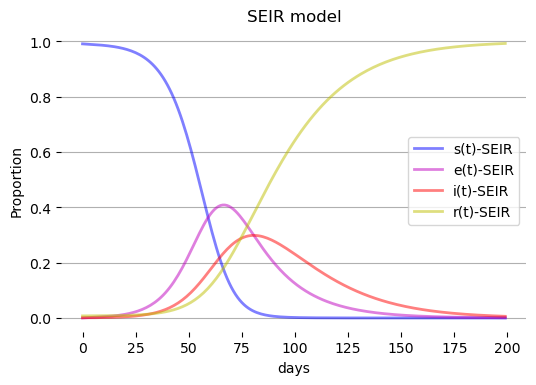

In [3]:
#Defining the SEIR model
def SEIR(y, t, lamda, delta, mu): 
    S, E, I, R= y
    ds_dt = - lamda * S * I            # ds/dt = -lamda*s*i
    de_dt = lamda * S * I - delta * E  # de/dt = lamda*s*i - delta*e
    di_dt = delta * E - mu * I         # di/dt = delta*e - mu*i
    dr_dt = mu * I
    return np.array([ds_dt,de_dt,di_dt,dr_dt])

N = 13.24e8 
# Daily exposure rate, the average number of susceptible persons effectively exposed to the disease per day
lamda = 0.5
#lam2 = 0.25 

# Daily incidence, proportion of latents who become ill each day to the total number of latents
delta = 0.05  

# Daily cure rate, number of patients cured per day as a proportion of the total number of patients cured
mu = 0.05  

#Number of exposures during the infectious period
sigma = lamda / mu  

fsig = 1-1/sigma

#Predicted date length
tEnd = 200

t = np.arange(0.0, tEnd, 1)  # (start,stop,step)

#Initial value of the proportion of people with the disease
i0 = 1e-3  
e0 = 0  
r0 = (148994 + 9883461) / N
s0 = 1 - i0 - r0 - e0
Y0 = (s0, e0, i0, r0)  

SEIR = odeint(SEIR, Y0, t, args=(lamda,delta,mu)) 

fig, ax = plt.subplots(facecolor='w', dpi=100)

for index, color, label_name in zip(range(4), ['b','m','r','y'], ['s(t)-SEIR', 'e(t)-SEIR', 'i(t)-SEIR','r(t)-SEIR']):
    ax.plot(t, SEIR[:, index], color, alpha=0.5, lw=2, label=label_name)

#print("λ={}\t λ2={}\t δ={}\t (1-1/sig)={}".format(lamda,lam2,sigma,fsig))
plt.title("SEIR model")
ax.set_xlabel('days')
ax.set_ylabel('Proportion')
ax.legend()
ax.grid(axis='y')
plt.box(False)


In [4]:
data = pd.read_csv('Data_India.csv')
India = data[data['Country'] == 'India']
infectious_real = India['total_confirmed'] / N
recovered_real = (India['total_recoverd'] + India['total_deaths']) / N
susceptible_real = 1 - infectious_real - recovered_real

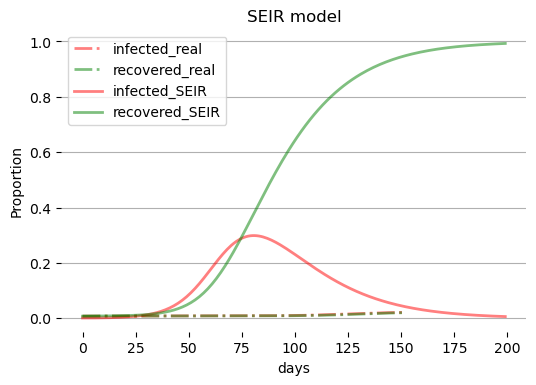

In [5]:
fig, ax = plt.subplots(facecolor='w', dpi=100)

plt.plot(infectious_real, 'r-.', alpha=0.5, lw=2, label='infected_real')
plt.plot(recovered_real, 'g-.', alpha=0.5, lw=2, label='recovered_real')

for index, color, label_name in zip(range(2,4), ['r','g'], [ 'infected_SEIR','recovered_SEIR']):
    ax.plot(t, SEIR[:, index], color, alpha=0.5, lw=2, label=label_name)

plt.title("SEIR model")
ax.set_xlabel('days')
ax.set_ylabel('Proportion')
ax.legend()
ax.grid(axis='y')
plt.box(False)

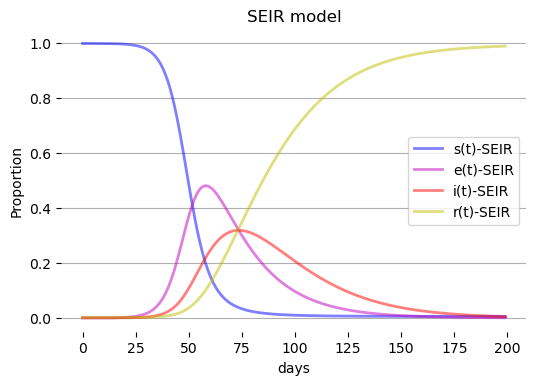

In [6]:
def SEIR2(y, t, lamda, lam2, delta, mu):  
    S, E, I, R = y
    ds_dt = - lamda * S * I - lam2 * S * E            
    de_dt = lamda * S * I + lam2 * S * E - delta * E  
    di_dt = delta * E - mu * I                       
    dr_dt = mu * I  
    return np.array([ds_dt,de_dt,di_dt,dr_dt])

N = 13.24e8 
# Daily exposure rate, the average number of susceptible persons effectively exposed to the disease per day
lamda = 0.01
lam2 = 0.25 

# Daily incidence, proportion of latents who become ill each day to the total number of latents
delta = 0.05  

# Daily cure rate, number of patients cured per day as a proportion of the total number of patients cured
mu = 0.05  

#Number of exposures during the infectious period
sigma = lamda / mu  

fsig = 1-1/sigma

#Predicted date length
tEnd = 200  

t = np.arange(0.0, tEnd, 1)  # (start,stop,step)

#Initial value of the proportion of people with the disease
i0 = 1e-3 
#i0 = 19164969
#r0 = 211853 + 15992271
e0 = 0  
s0 = 1 - i0 
r0 = 1 - s0
Y0 = (s0, e0, i0, r0)  

SEIR2 = odeint(SEIR2, Y0, t, args=(lamda,lam2,delta,mu))  # SEIR2 model

fig, ax = plt.subplots(facecolor='w', dpi=100)
for index, color, label_name in zip(range(4), ['b','m','r','y'], ['s(t)-SEIR', 'e(t)-SEIR', 'i(t)-SEIR', 'r(t)-SEIR']):
    ax.plot(t, SEIR2[:, index], color, alpha=0.5, lw=2, label=label_name)

#print("λ={}\t λ2={}\t δ={}\t (1-1/sig)={}".format(lamda,lam2,sigma,fsig))
plt.title("SEIR model")
ax.set_xlabel('days')
ax.set_ylabel('Proportion')
ax.legend()
ax.grid(axis='y')
plt.box(False)


λ=0.5	 λ2=0.25	 δ=10.0	 (1-1/sig)=0.9


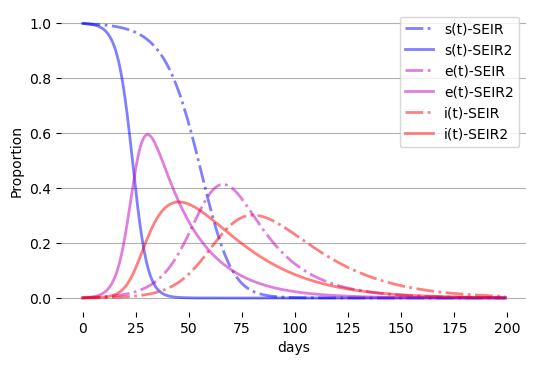

In [7]:
def SEIR(y, t, lamda, delta, mu): 
    S, E, I = y
    ds_dt = - lamda * S * I            # ds/dt = -lamda*s*i
    de_dt = lamda * S * I - delta * E  # de/dt = lamda*s*i - delta*e
    di_dt = delta * E - mu * I         # di/dt = delta*e - mu*i
    return np.array([ds_dt,de_dt,di_dt])

def SEIR2(y, t, lamda, lam2, delta, mu):  
    S, E, I = y
    ds_dt = - lamda * S * I - lam2 * S * E            # ds/dt = -lamda*s*i - lam2*s*e
    de_dt = lamda * S * I + lam2 * S * E - delta * E  # de/dt = lamda*s*i - delta*e
    di_dt = delta * E - mu * I                        # di/dt = delta*e - mu*i
    return np.array([ds_dt,de_dt,di_dt])

N = 13.24e8 
# Daily exposure rate, the average number of susceptible persons effectively exposed to the disease per day
lamda = 0.5
lam2 = 0.25 

# Daily incidence, proportion of latents who become ill each day to the total number of latents
delta = 0.05  

# Daily cure rate, number of patients cured per day as a proportion of the total number of patients cured
mu = 0.05  

#Number of exposures during the infectious period
sigma = lamda / mu  

fsig = 1-1/sigma

#Predicted date length
tEnd = 200  

t = np.arange(0.0, tEnd, 1)  # (start,stop,step)

#Initial value of the proportion of people with the disease
i0 = 1e-3  
e0 = 0  
s0 = 1-i0  
Y0 = (s0, e0, i0)  

SEIR = odeint(SEIR, Y0, t, args=(lamda,delta,mu))  
SEIR2 = odeint(SEIR2, Y0, t, args=(lamda,lam2,delta,mu))  

fig, ax = plt.subplots(facecolor='w', dpi=100)

#
ax.plot(t, SEIR[:,0], 'b-.', alpha=0.5, lw=2, label='s(t)-SEIR')
ax.plot(t, SEIR2[:,0], 'b', alpha=0.5, lw=2, label='s(t)-SEIR2')

ax.plot(t, SEIR[:,1], 'm-.', alpha=0.5, lw=2, label='e(t)-SEIR')
ax.plot(t, SEIR2[:,1], 'm', alpha=0.5, lw=2, label='e(t)-SEIR2')

ax.plot(t, SEIR[:,2], 'r-.', alpha=0.5, lw=2, label='i(t)-SEIR')
ax.plot(t, SEIR2[:,2], 'r', alpha=0.5, lw=2, label='i(t)-SEIR2')

print("λ={}\t λ2={}\t δ={}\t (1-1/sig)={}".format(lamda,lam2,sigma,fsig))

ax.set_xlabel('days')
ax.set_ylabel('Proportion')

ax.legend()
ax.grid(axis='y')
plt.box(False)

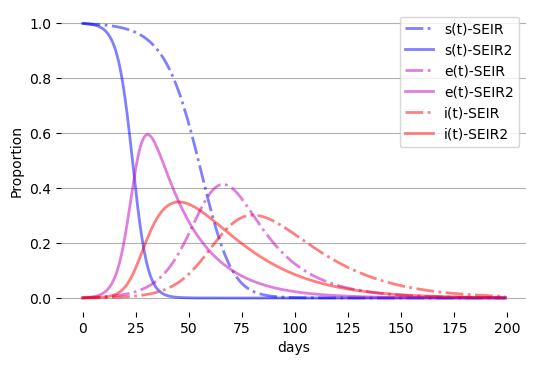

In [8]:
fig, ax = plt.subplots(facecolor='w', dpi=100)
# 绘制估计的I曲线与真实的S曲线
ax.plot(t, SEIR[:,0], 'b-.', alpha=0.5, lw=2, label='s(t)-SEIR')
ax.plot(t, SEIR2[:,0], 'b', alpha=0.5, lw=2, label='s(t)-SEIR2')
# 绘制估计的R曲线与真实的E曲线
ax.plot(t, SEIR[:,1], 'm-.', alpha=0.5, lw=2, label='e(t)-SEIR')
ax.plot(t, SEIR2[:,1], 'm', alpha=0.5, lw=2, label='e(t)-SEIR2')
# 绘制估计的R曲线与真实的I曲线
ax.plot(t, SEIR[:,2], 'r-.', alpha=0.5, lw=2, label='i(t)-SEIR')
ax.plot(t, SEIR2[:,2], 'r', alpha=0.5, lw=2, label='i(t)-SEIR2')

# 设置横纵座标轴
ax.set_xlabel('days')
ax.set_ylabel('Proportion')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)